In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM



In [2]:
df=pd.read_csv(r"/content/MARUTI.csv")
print(df)

            Date  Symbol Series  Prev Close     Open     High      Low  \
0     2003-07-09  MARUTI     EQ      125.00   164.90   170.40   155.00   
1     2003-07-10  MARUTI     EQ      164.30   167.00   168.70   164.50   
2     2003-07-11  MARUTI     EQ      167.00   167.75   174.85   166.25   
3     2003-07-14  MARUTI     EQ      173.35   174.25   179.25   174.25   
4     2003-07-15  MARUTI     EQ      177.95   200.00   200.00   173.00   
...          ...     ...    ...         ...      ...      ...      ...   
4422  2021-04-26  MARUTI     EQ     6676.10  6690.20  6789.00  6600.00   
4423  2021-04-27  MARUTI     EQ     6638.90  6669.95  6709.00  6542.00   
4424  2021-04-28  MARUTI     EQ     6568.75  6568.75  6650.00  6545.00   
4425  2021-04-29  MARUTI     EQ     6573.80  6635.00  6647.45  6552.00   
4426  2021-04-30  MARUTI     EQ     6565.65  6537.10  6559.60  6421.00   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      164.00   164.30   165.95  35164283 

In [3]:
df.shape

(4427, 15)

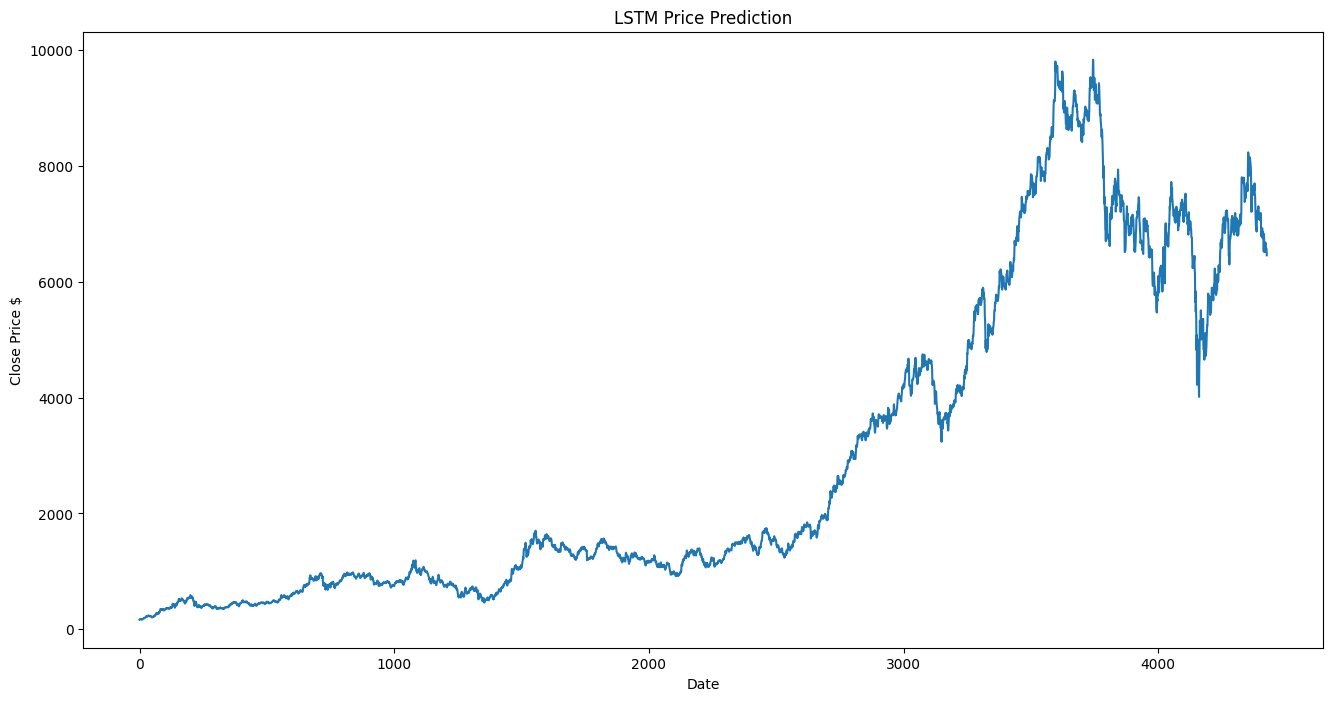

In [4]:
plt.figure(figsize=(16,8))
plt.title('LSTM Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.plot(df["Close"])
plt.show()

In [5]:
data=df.filter(['Close'])
dataset=data.values


In [6]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

3542

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data


array([[0.00000000e+00],
       [2.79267492e-04],
       [9.36063259e-04],
       ...,
       [6.62949996e-01],
       [6.62107022e-01],
       [6.50729457e-01]])

In [8]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0010757 , 0.00101364, 0.00096709, 0.00150494, 0.00165492,
       0.00173766, 0.00171181, 0.00236343, 0.0034443 , 0.00303057,
       0.0028237 , 0.00321675, 0.00339775, 0.00392009, 0.00477341,
       0.00553363, 0.00540434, 0.00544054, 0.00531125, 0.00627835,
       0.00658347, 0.00672311, 0.00586979, 0.00704892, 0.00724027,
       0.00659382, 0.00735404, 0.00736956, 0.00643867, 0.0060508 ,
       0.00592151, 0.00672311, 0.00666622, 0.00660933, 0.00656796,
       0.00634558, 0.00579739, 0.0045562 , 0.00457171, 0.00535263,
       0.00427176, 0.00428727, 0.00479926, 0.00505267, 0.00575601,
       0.00510956, 0.00522334, 0.0065059 , 0.00705926, 0.00663519])]
[0.007250611544090645]



In [9]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [10]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3482, 50, 1)

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0,2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.fit(x_train, y_train, epochs=1,batch_size=1, verbose=1)

3482/3482 [==============================] - 65s 18ms/step - loss: 0.0023


In [14]:
test_data=scaled_data[training_data_len-50: , :]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-50:i,0])
    


In [15]:
x_test=np.array(x_test)

In [16]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
predictions=model.predict(x_test)


28/28 [==============================] - 2s 14ms/step


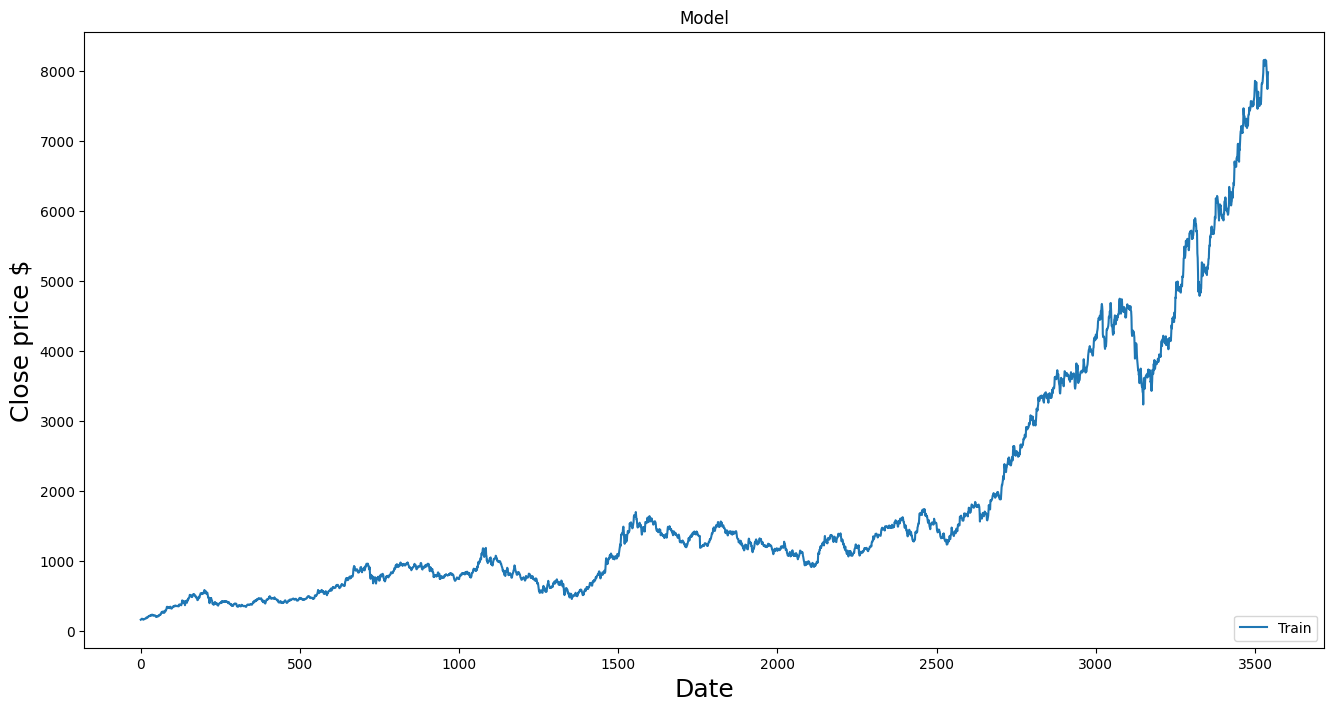

In [18]:
train=data[:training_data_len]
valid=data[training_data_len:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()
